# Importing the Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [166]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [167]:
df.shape

(1460, 81)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning and Data Preprocessing

In [169]:
print(df.isna().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Dropping following columns   
because of more than 50% missing values  
- Alley, FireplaceQu, PoolQC, Fence, MiscFeature

In [170]:
df = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df.shape

(1460, 76)

In [171]:
pd.set_option('display.max_columns', None)
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Differentiating Numerical and categorical variables

In [172]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

**************************************************


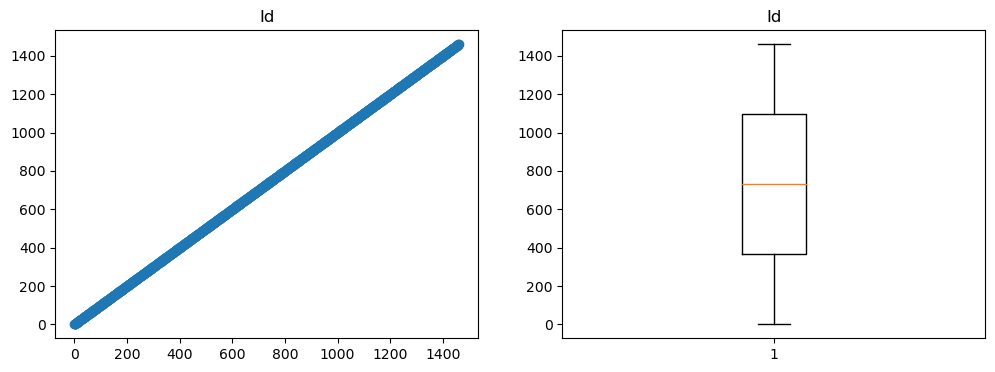

**************************************************


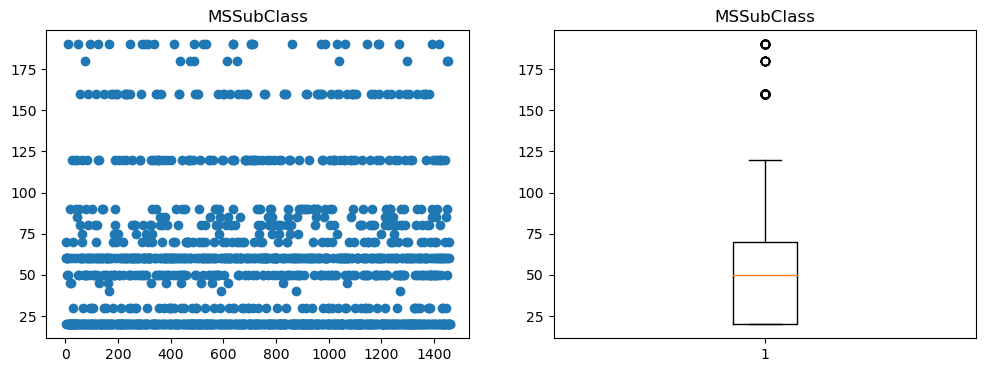

**************************************************


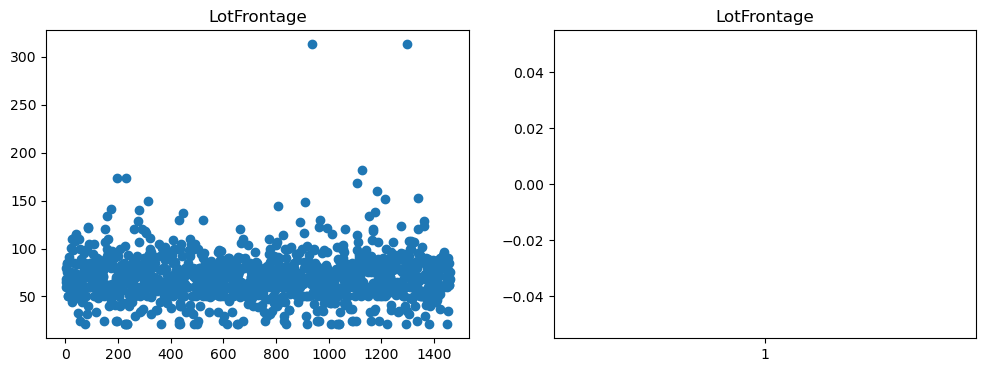

**************************************************


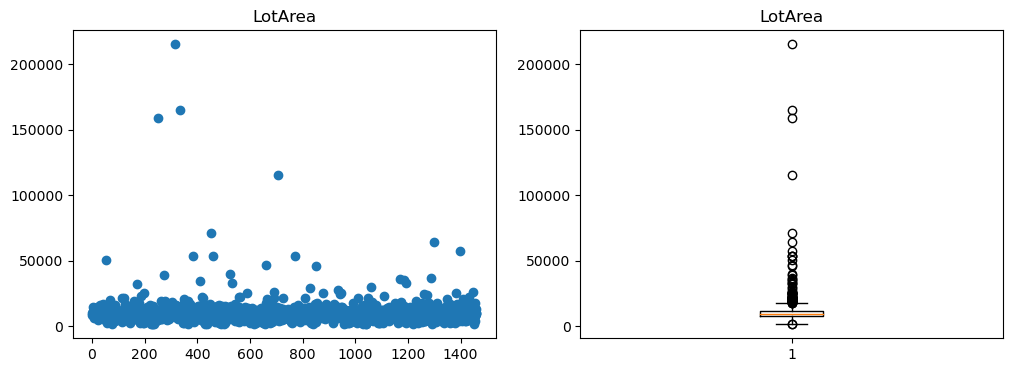

**************************************************


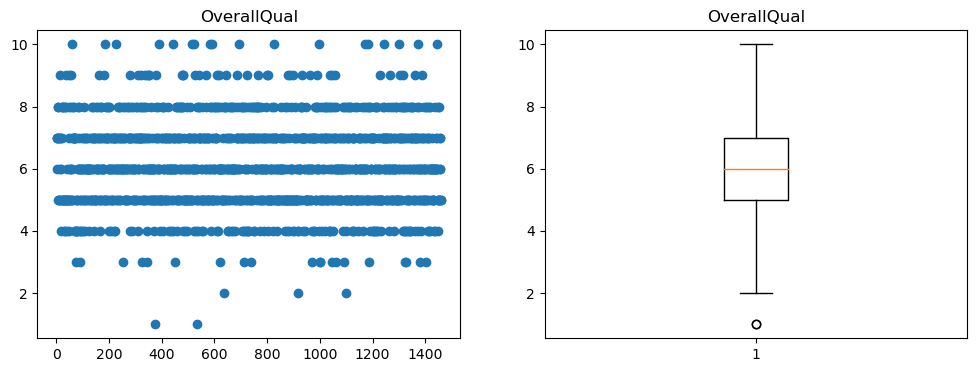

**************************************************


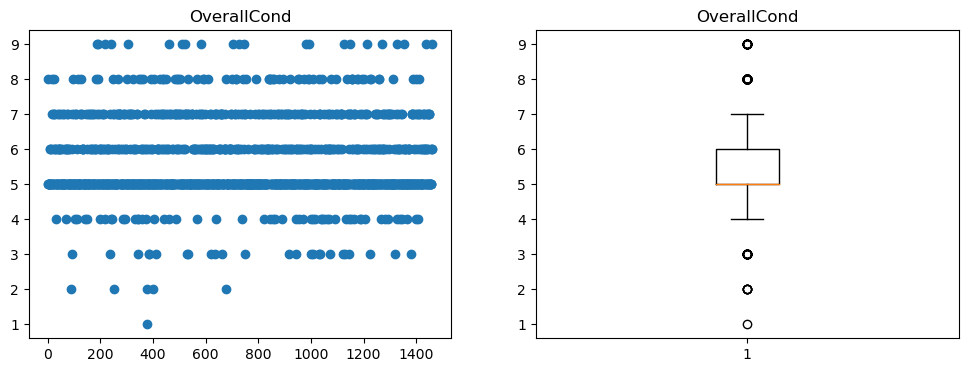

**************************************************


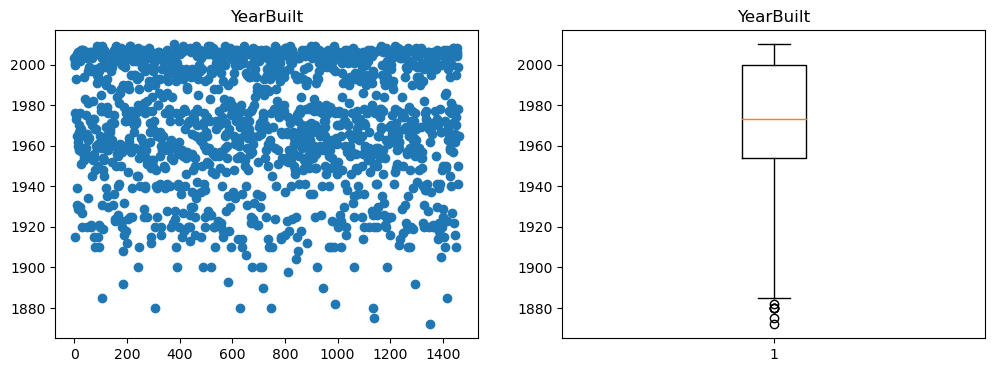

**************************************************


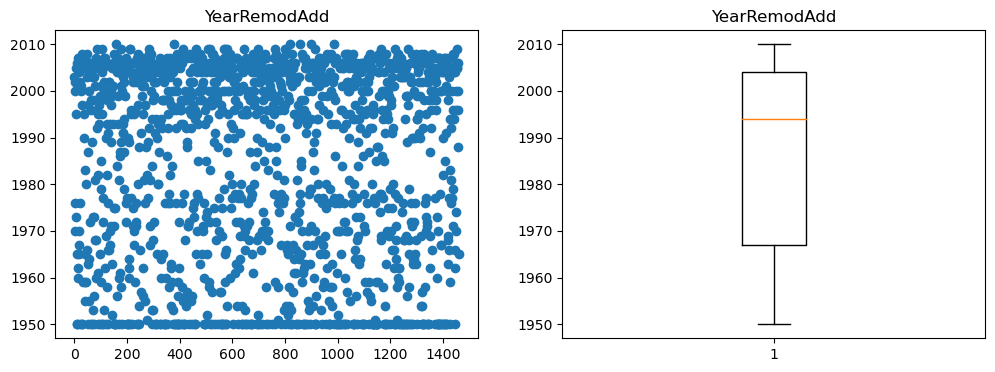

**************************************************


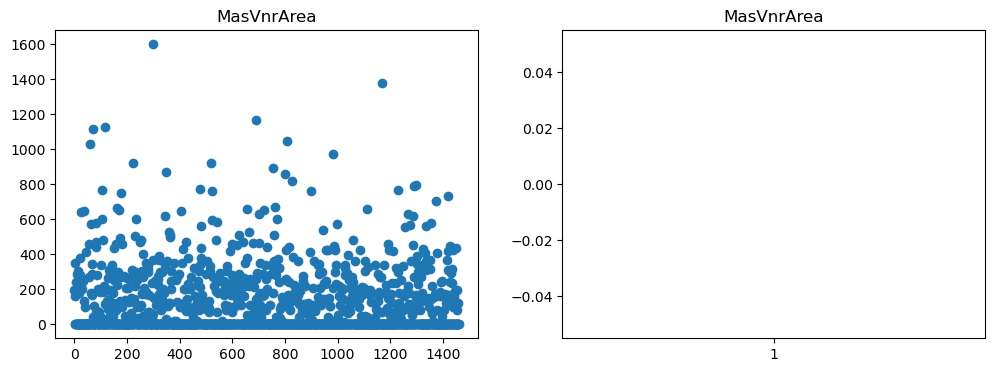

**************************************************


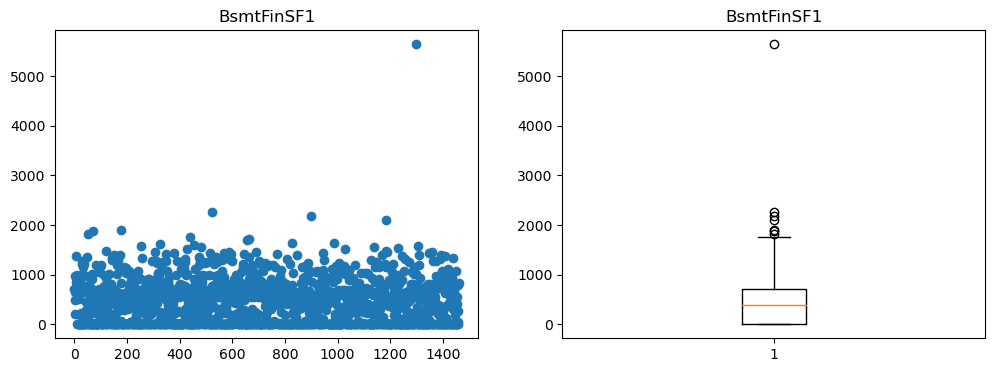

**************************************************


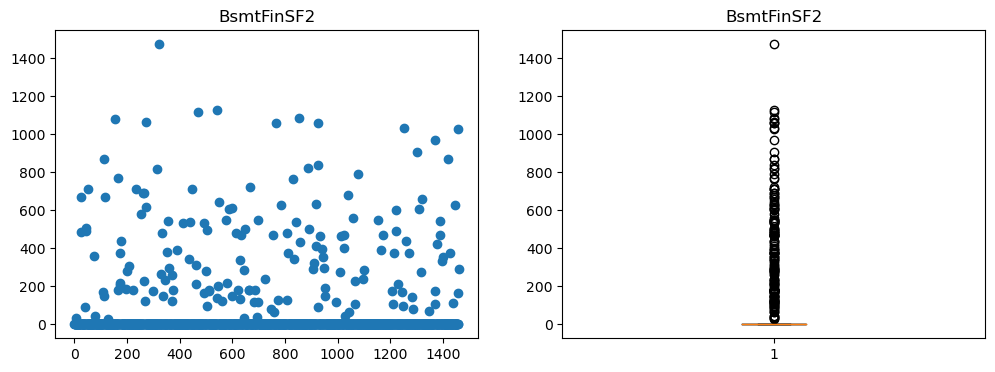

**************************************************


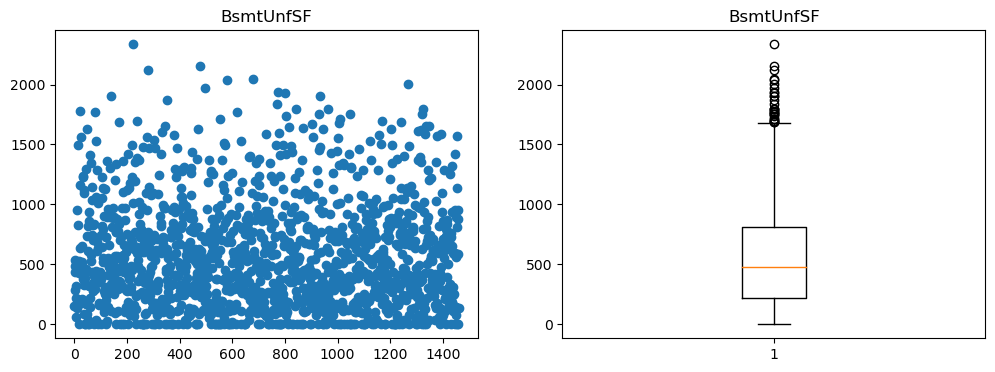

**************************************************


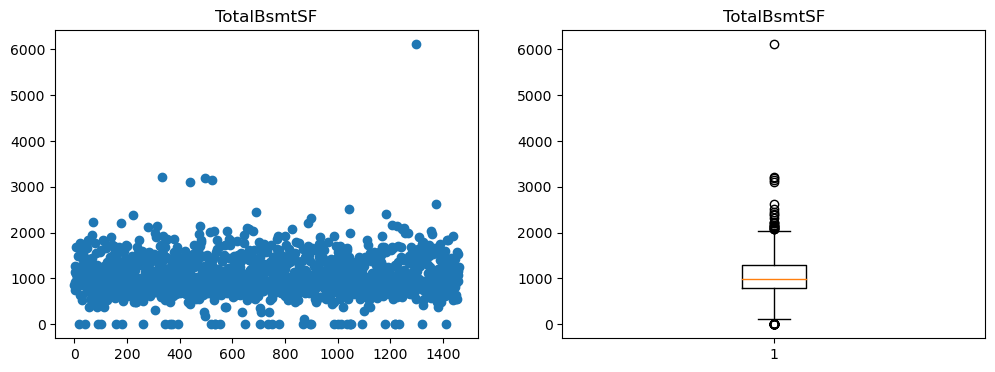

**************************************************


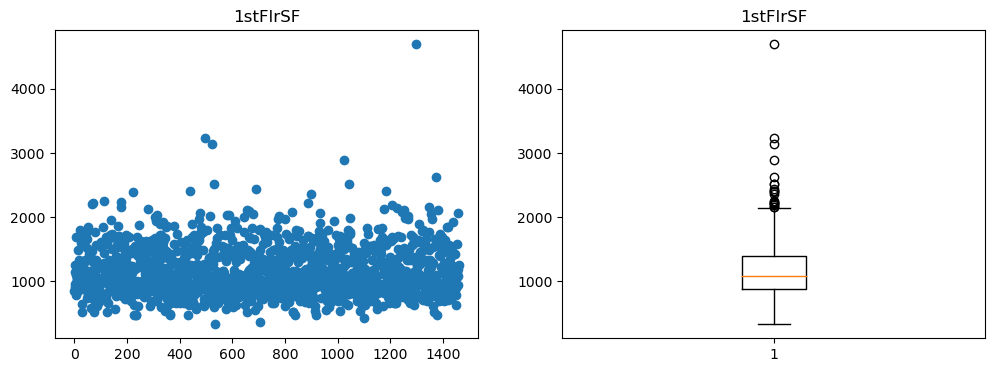

**************************************************


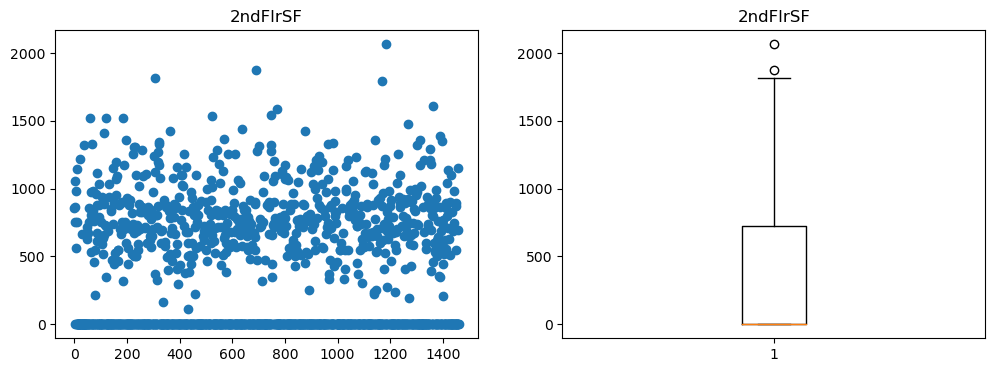

**************************************************


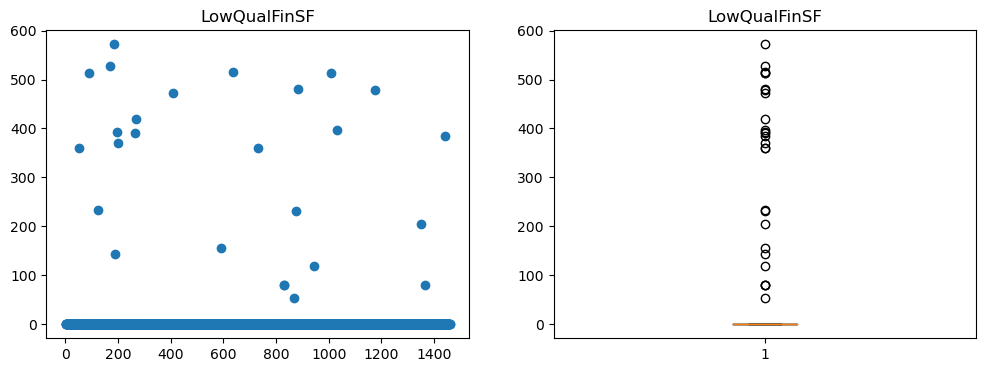

**************************************************


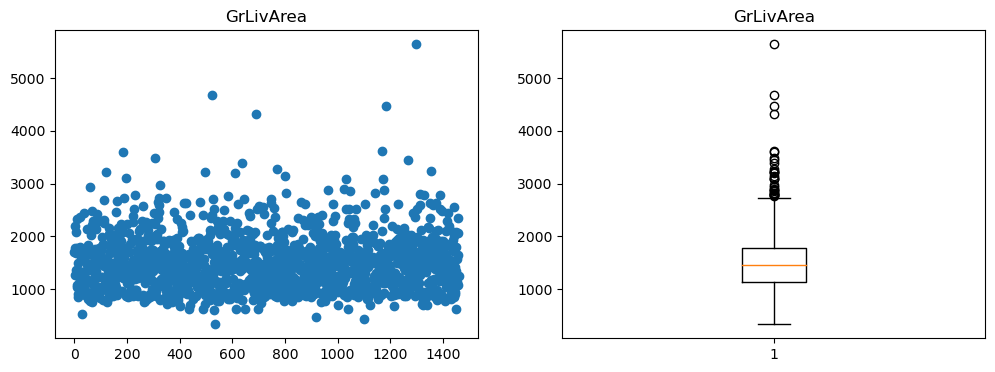

**************************************************


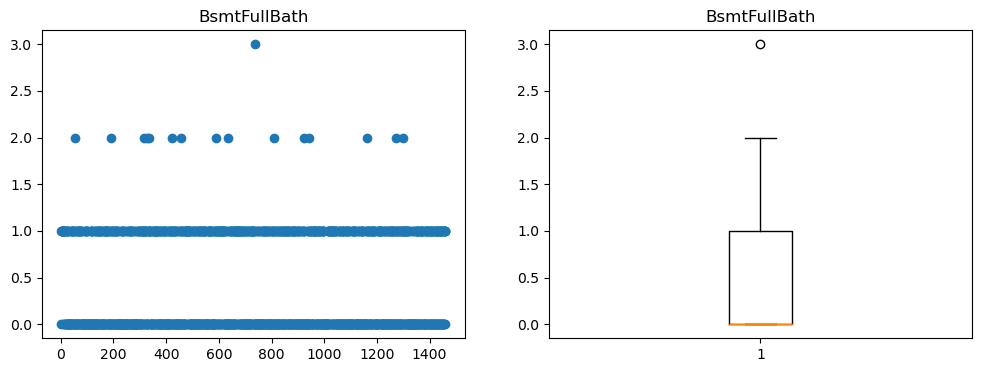

**************************************************


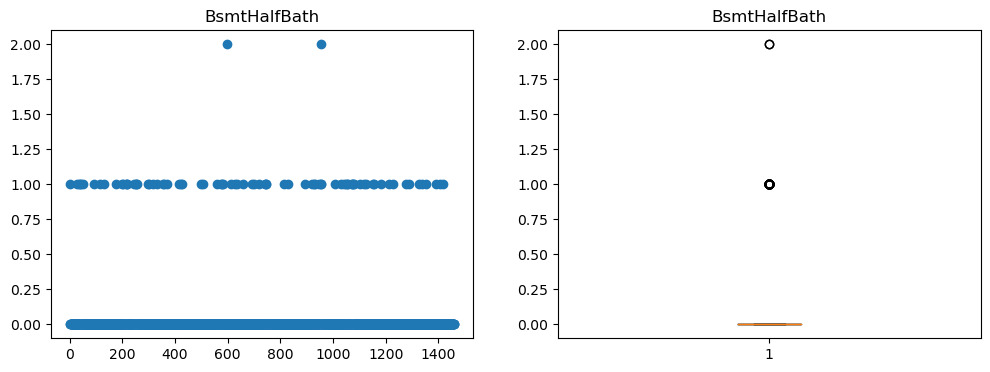

**************************************************


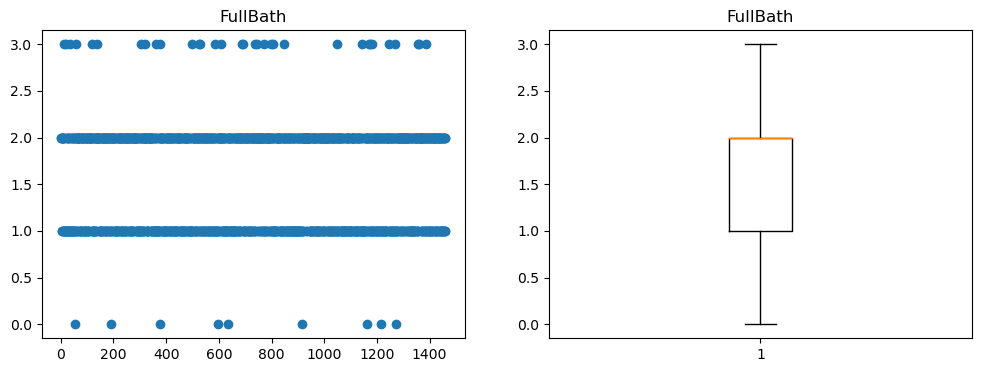

**************************************************


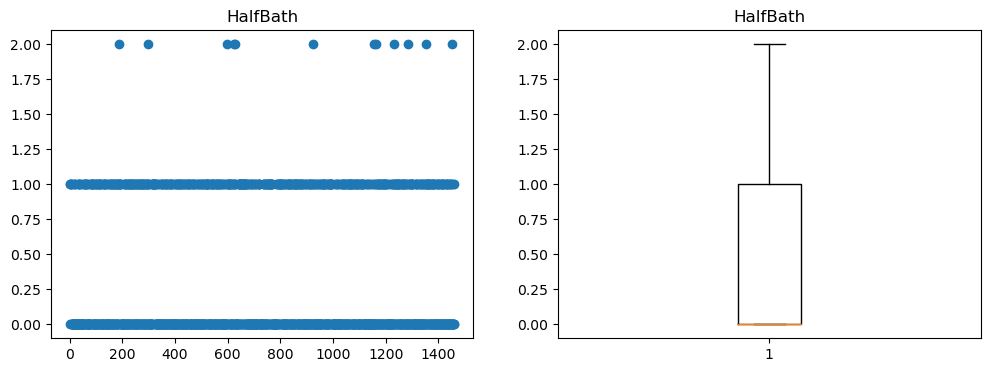

**************************************************


**************************************************


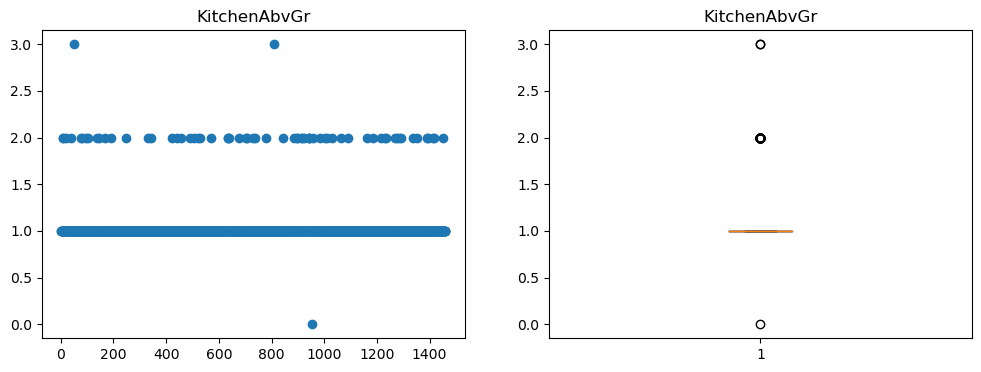

**************************************************


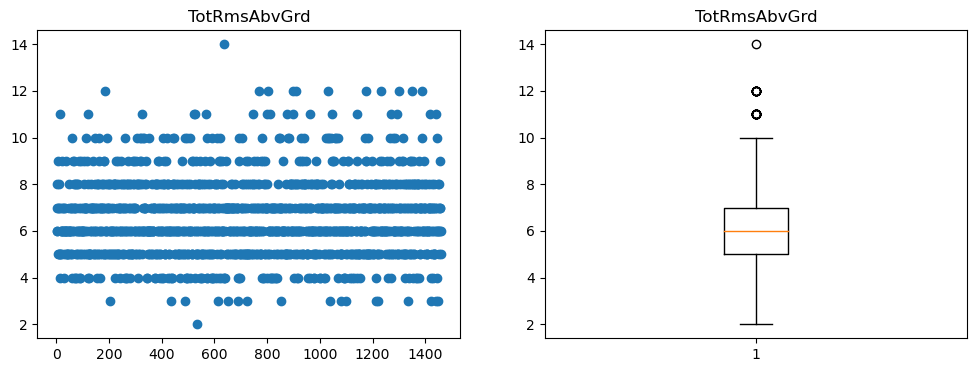

**************************************************


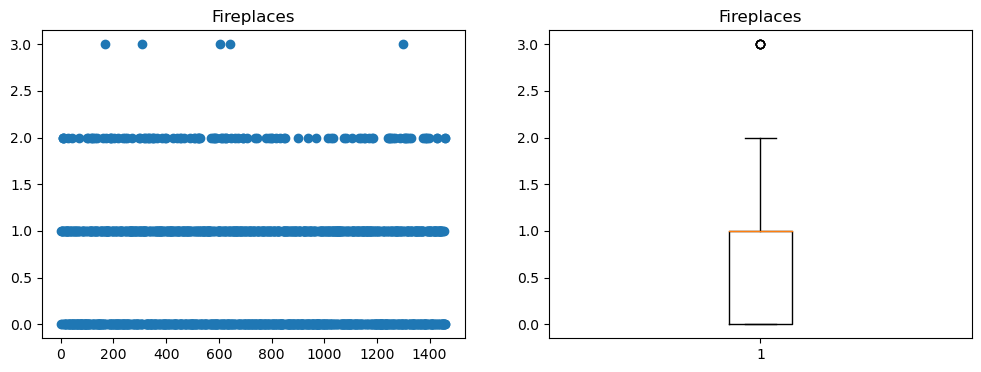

**************************************************


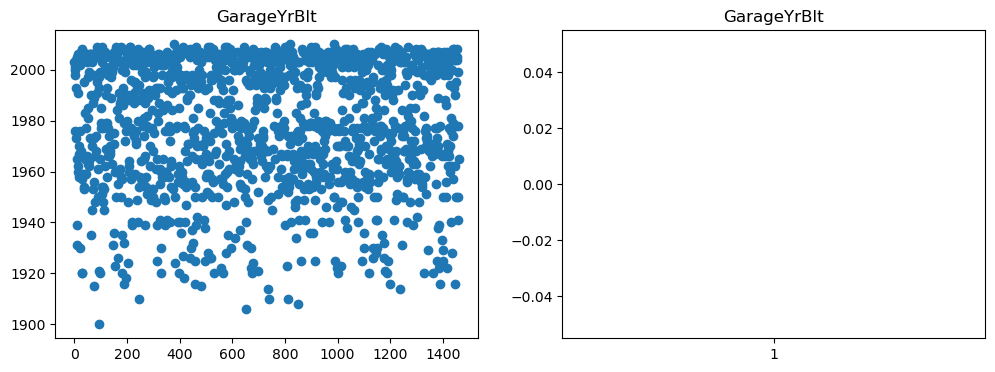

**************************************************


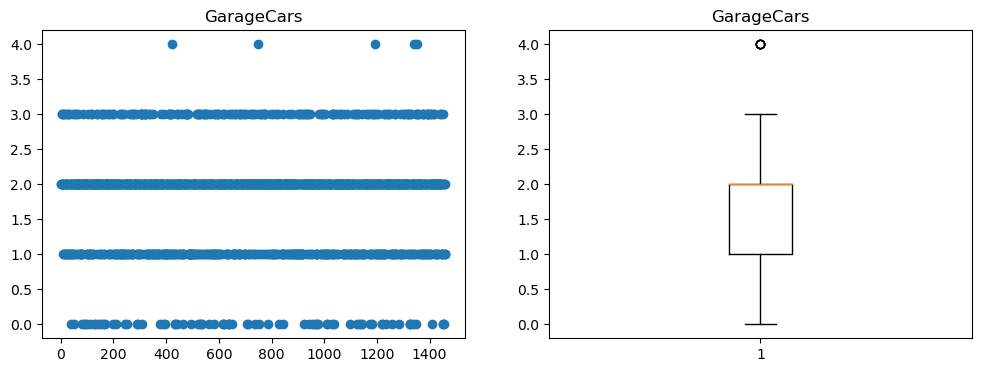

**************************************************


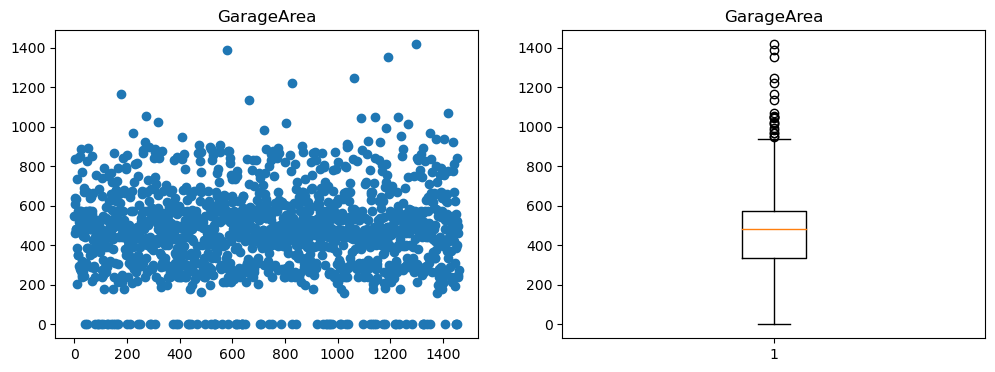

**************************************************


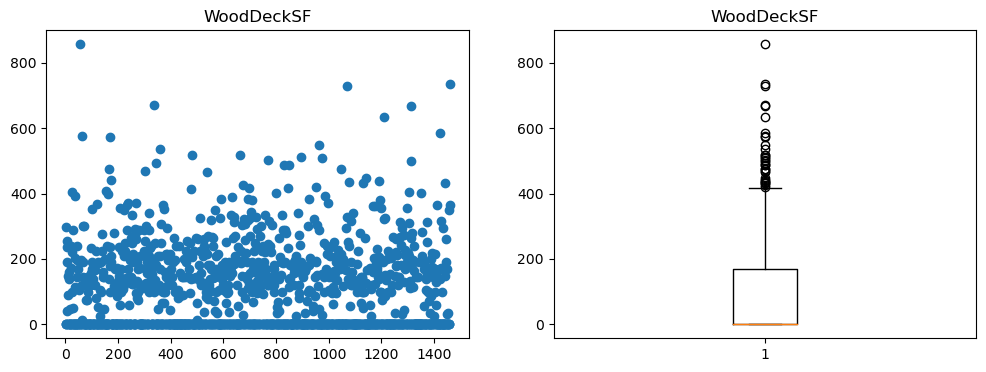

**************************************************


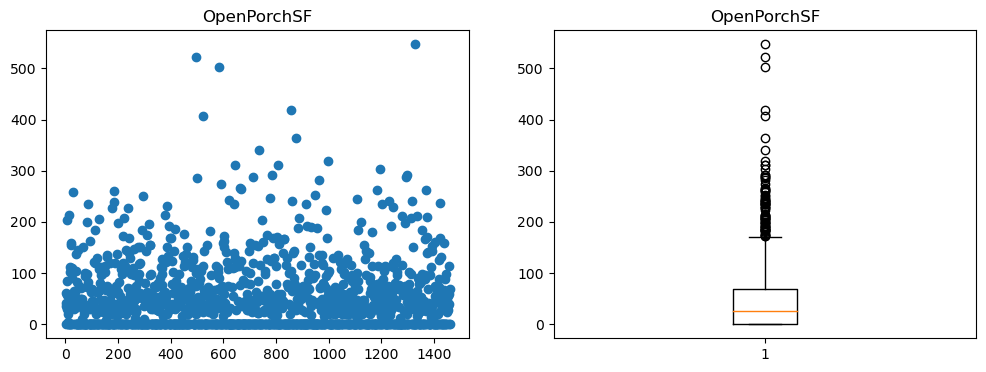

**************************************************


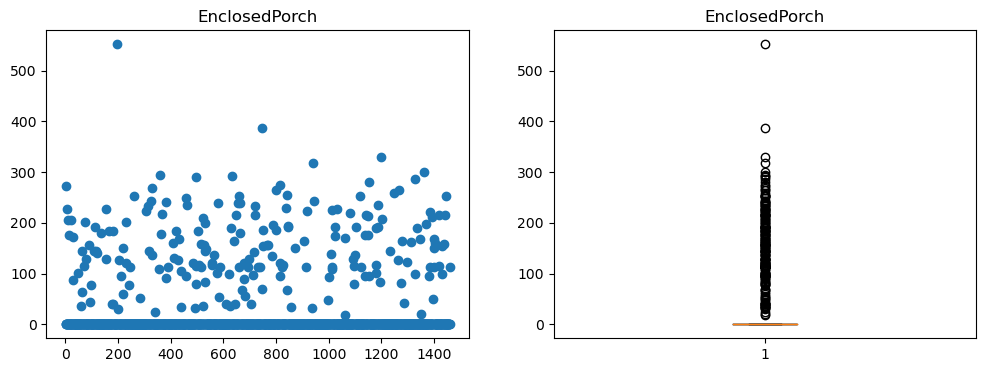

**************************************************


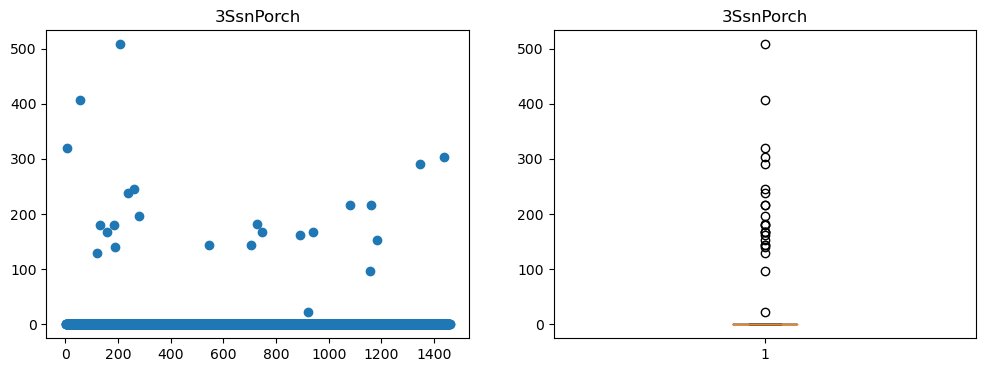

**************************************************


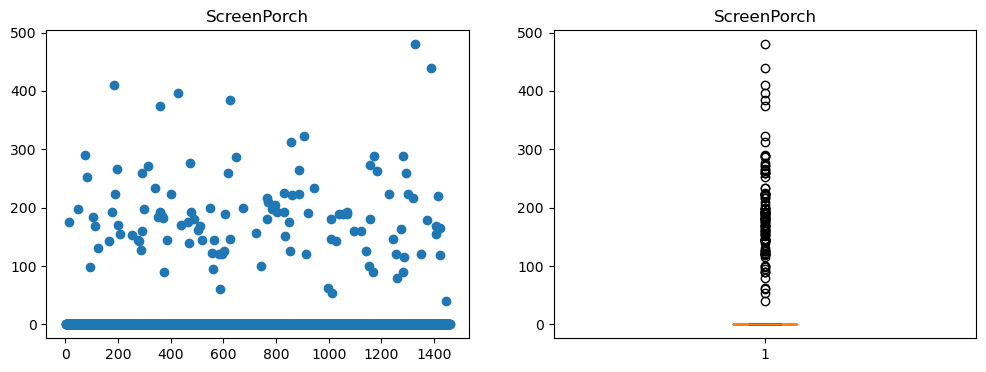

**************************************************


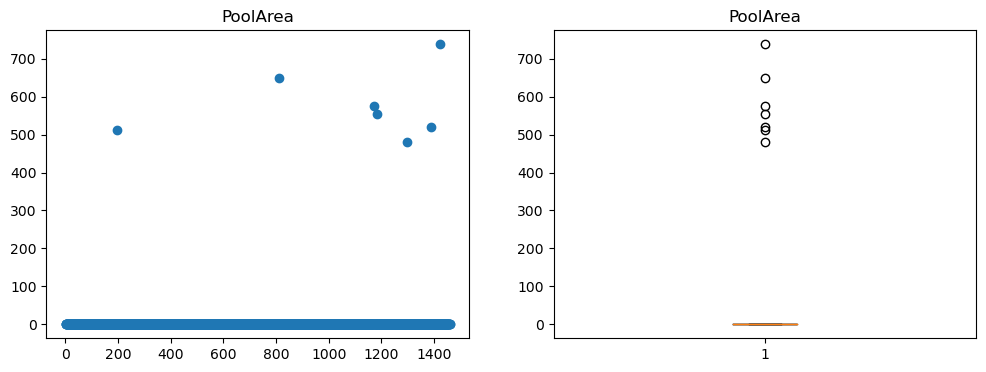

**************************************************


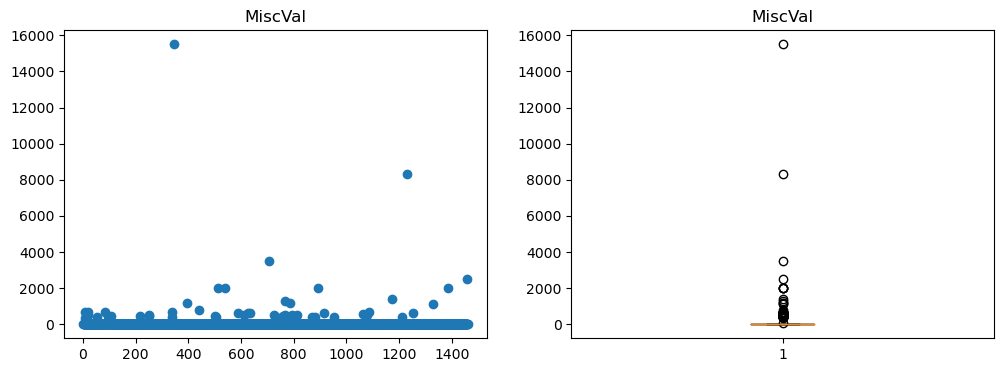

**************************************************


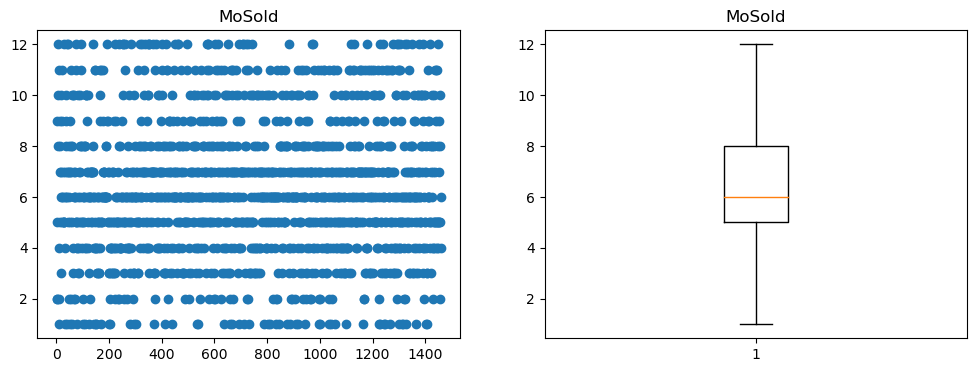

**************************************************


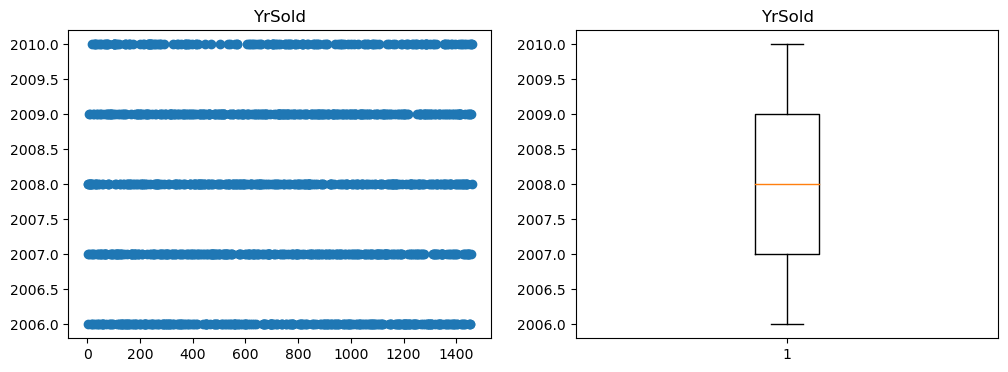

**************************************************


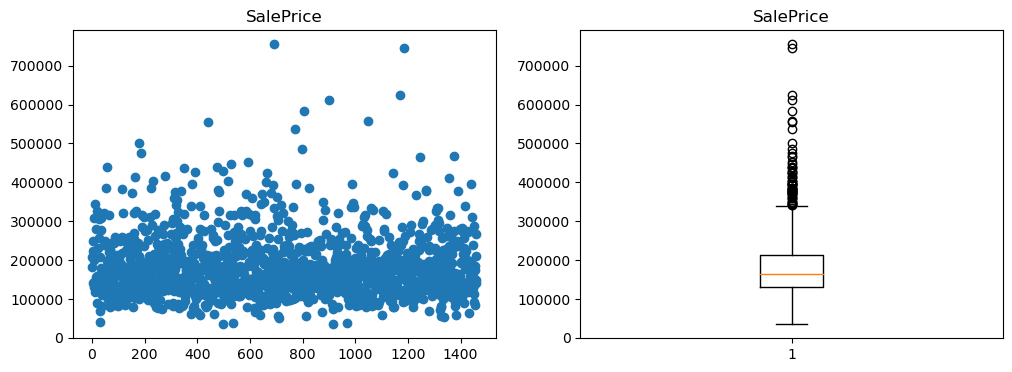

In [173]:
# There are some categorical variables with dtype=['int64', 'float64']
# Plotting the graph and classifying them as categorical variables

col = df_numeric.columns
for feature in col:
    print("*" * 50)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].scatter(df_numeric['Id'], df[feature])
    axs[0].set_title(feature)

    axs[1].boxplot(df_numeric[feature])
    axs[1].set_title(feature)

    plt.show()

In [174]:
# From the graph, we found that following are categorical variables though its dtype is int or float
categorical = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']        
print(categorical)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


### Numerical Variable

In [175]:
df_numeric = df_numeric.drop(categorical, axis=1)
print(df_numeric.shape)
df_numeric.head()

(1460, 24)


Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0       1710       2003.0         548           0           61              0   
1       1262       1976.0         460         298            0              0   
2       1786       2001.0         608           0           42              0   
3       1717       1998.0         642           0           35            272   
4       2198       2000.0         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  
0          0            0         0        0     208500  
1          0            0         0        0     181500  
2          0            0         0        0     223500  
3          0            0         0        0     140000  
4          0            0         0        0     250000

### Categorical Variables

In [176]:
df_categorical1 = df.select_dtypes(include=['object'])
df_categorical = pd.concat([df[categorical], df_categorical1], axis=1)
df_categorical.head()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   MoSold  YrSold MSZoning Street LotShape LandContour Utilities LotConfig  \
0       2    2008       RL   Pave      Reg         Lvl    AllPub    Inside   
1       5    2007       RL   Pave      Reg         Lvl    AllPub       FR2   
2       9    2008       RL   Pave      IR1         Lvl    AllPub    Inside   
3       2    2006       RL   Pave      IR1         Lvl    AllPub    Corner   
4      12    2008       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [177]:
# Finding the Categorical variables which has many unique values
categorical_col = df_categorical.columns
drop = []
for feature in categorical_col:
    print("*" * 80)
    print(feature)
    print(df_categorical[feature].value_counts())
    if (df_categorical[feature].nunique() >= 15):
        drop.append(feature)

print("-" * 80)
print('drop features = ', drop)
print("-" * 80)

# Code for dropping "drop" features which has more than 15 unique values 
# df_categorical = df_categorical.drop(drop, axis=1)

# But here I am keeping all the categorical variables. 
# Right now I am not dropping any categorical variables. 

********************************************************************************
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
********************************************************************************
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
********************************************************************************
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
********************************************************************************
BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
********************************************************************************
BsmtHalfBath
0    1378
1      80
2   

# Replacing the missing values

### Replacing missing values in Numerical variables with 'Mean' 

In [178]:
numeric_col = df_numeric.columns
for feature in numeric_col:
     if (df_numeric[feature].isna().sum() != 0):
         df_numeric[df_numeric[feature].isna()] = df_numeric[feature].mean() 

### Replacing Categorical variables with 'Mode' (Maximum categorical value)

In [179]:
categorical_col = df_categorical.columns
for feature in categorical_col:
     if (df_categorical[feature].isna().sum() != 0):
         mode_value = df_categorical[feature].mode()[0]
         df_categorical[feature] = df_categorical[feature].fillna(mode_value)

## Creating Dummy Variables

In [180]:
categorical_col = df_categorical.columns
for feature in categorical_col:
    df_categorical[feature] = df_categorical[feature].astype('object')
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   OverallQual    1460 non-null   object
 2   OverallCond    1460 non-null   object
 3   BsmtFullBath   1460 non-null   object
 4   BsmtHalfBath   1460 non-null   object
 5   FullBath       1460 non-null   object
 6   HalfBath       1460 non-null   object
 7   BedroomAbvGr   1460 non-null   object
 8   KitchenAbvGr   1460 non-null   object
 9   TotRmsAbvGrd   1460 non-null   object
 10  Fireplaces     1460 non-null   object
 11  GarageCars     1460 non-null   object
 12  MoSold         1460 non-null   object
 13  YrSold         1460 non-null   object
 14  MSZoning       1460 non-null   object
 15  Street         1460 non-null   object
 16  LotShape       1460 non-null   object
 17  LandContour    1460 non-null   object
 18  Utilities      1460 non-null

In [181]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  \
0              1              0              0               0              0   
1              0              0              0               0              0   
2              1              0              0               0              0   
3              1              0              0               0              0   
4              0              1              0               0              0   

   OverallCond_3  OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              1              0              0   

   OverallCond_8  OverallCond_9  BsmtFullBath_1  BsmtFullBath_2  \
0              0              0               1               0   
1              1              0               0               0   
2              0              0               1               0   
3              0              0               1               0   
4              0              0               1               0   

   BsmtFullBath_3  BsmtHalfBath_1  BsmtHalfBath_2  FullBath_1  FullBath_2  \
0               0               0               0           0           1   
1               0               1               0           0           1   
2               0               0               0           0           1   
3               0               0               0           1           0   
4               0               0               0           0           1   

   FullBath_3  HalfBath_1  HalfBath_2  BedroomAbvGr_1  BedroomAbvGr_2  \
0           0           1           0               0               0   
1           0           0           0               0               0   
2           0           1           0               0               0   
3           0      

In [182]:
df_categorical = df_categorical.drop(list(categorical_col), axis=1)
df_categorical = pd.concat([df_categorical, df_dummies], axis=1)
df_categorical.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  \
0              1              0              0               0              0   
1              0              0              0               0              0   
2              1              0              0               0              0   
3              1              0              0               0              0   
4              0              1              0               0              0   

   OverallCond_3  OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              1              0              0   
4              0              0              1              0              0   

   OverallCond_8  OverallCond_9  BsmtFullBath_1  BsmtFullBath_2  \
0              0              0               1               0   
1              1              0               0               0   
2              0              0               1               0   
3              0              0               1               0   
4              0              0               1               0   

   BsmtFullBath_3  BsmtHalfBath_1  BsmtHalfBath_2  FullBath_1  FullBath_2  \
0               0               0               0           0           1   
1               0               1               0           0           1   
2               0               0               0           0           1   
3               0               0               0           1           0   
4               0               0               0           0           1   

   FullBath_3  HalfBath_1  HalfBath_2  BedroomAbvGr_1  BedroomAbvGr_2  \
0           0           1           0               0               0   
1           0           0           0               0               0   
2           0           1           0               0               0   
3           0      

# Correlation Between Numeric variables

<Axes: >

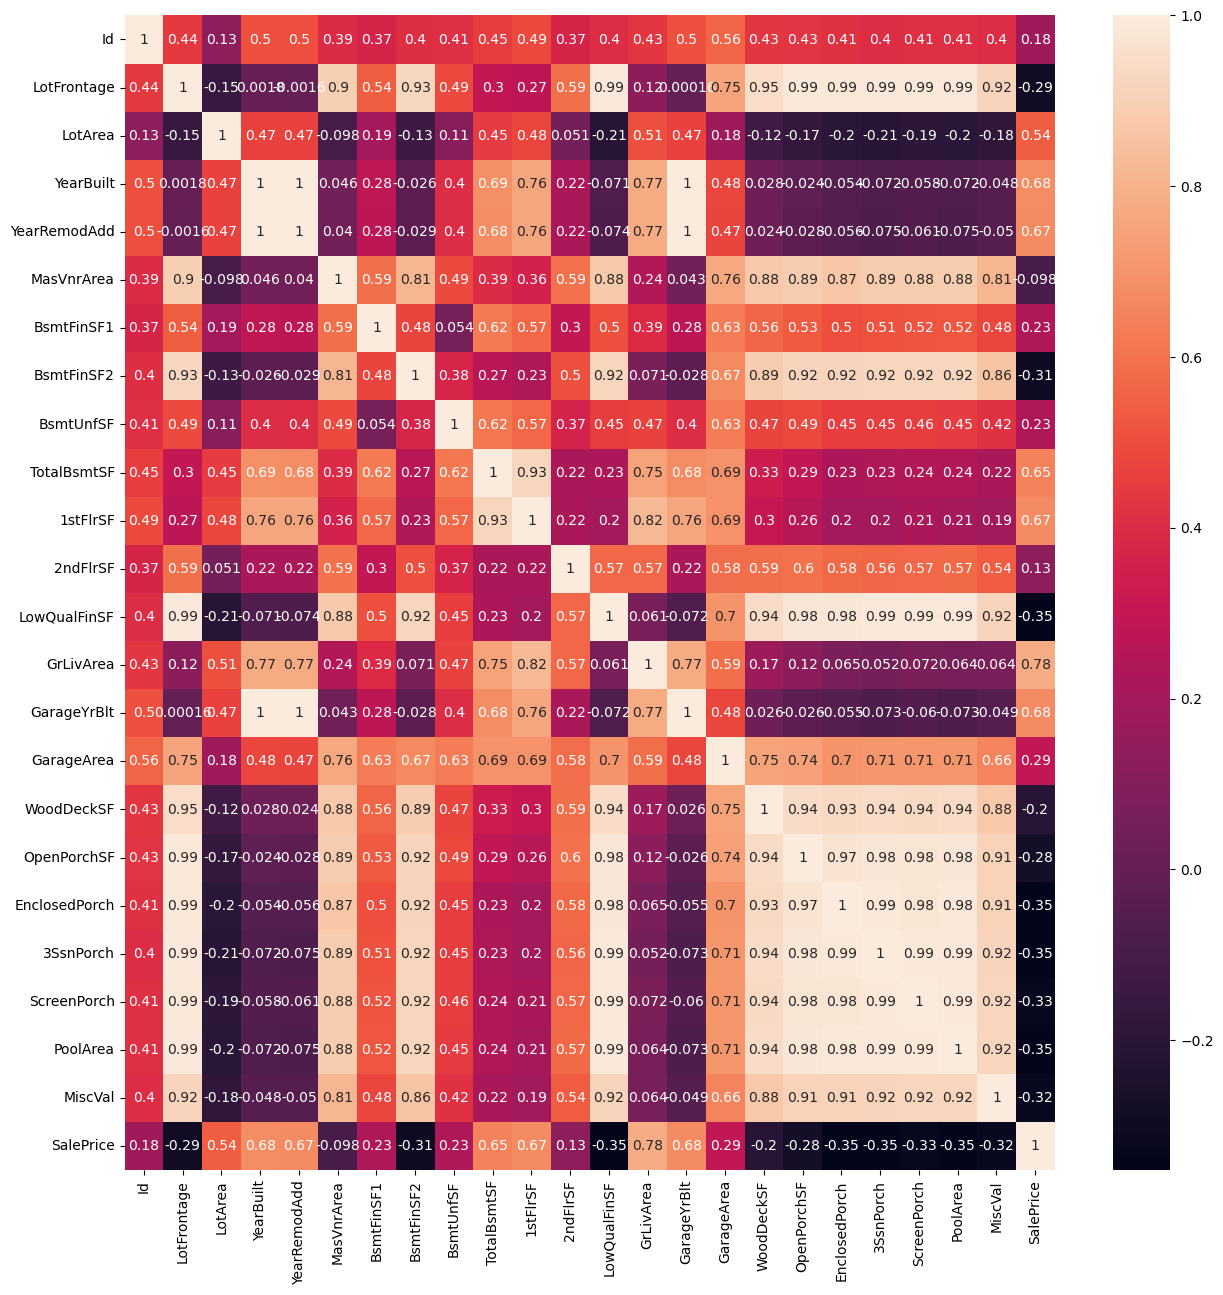

In [183]:
correlation = df_numeric.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)

### Insights:  
- 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',    
  'PoolArea', 'MiscVal', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF' - All are high positively correlated with each other (> 0.8)   
  and negatively correlated with Saleprice (-0.3)   
- 'TotalBsmtSF', '1stFlrSF' - These features are highly Positively correlated with each others.

In [184]:
# These features are highly Positively correlated with each others. 
# 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF'
# Keeping one variable 'LotFrontage' and removing others to avoid Multicollinearity in the data
 
df_numeric = df_numeric.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                              'PoolArea', 'MiscVal', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF'], axis=1)

# These features are highly Positively correlated with each others. - 'TotalBsmtSF', '1stFlrSF'
# Keeping one variable 'TotalBsmtSF' and removing others to avoid Multicollinearity in the data

df_numeric = df_numeric.drop(['TotalBsmtSF'], axis=1)

# Dropping ID as we dont need this in regression
df_numeric = df_numeric.drop(['Id'], axis=1)


<Axes: >

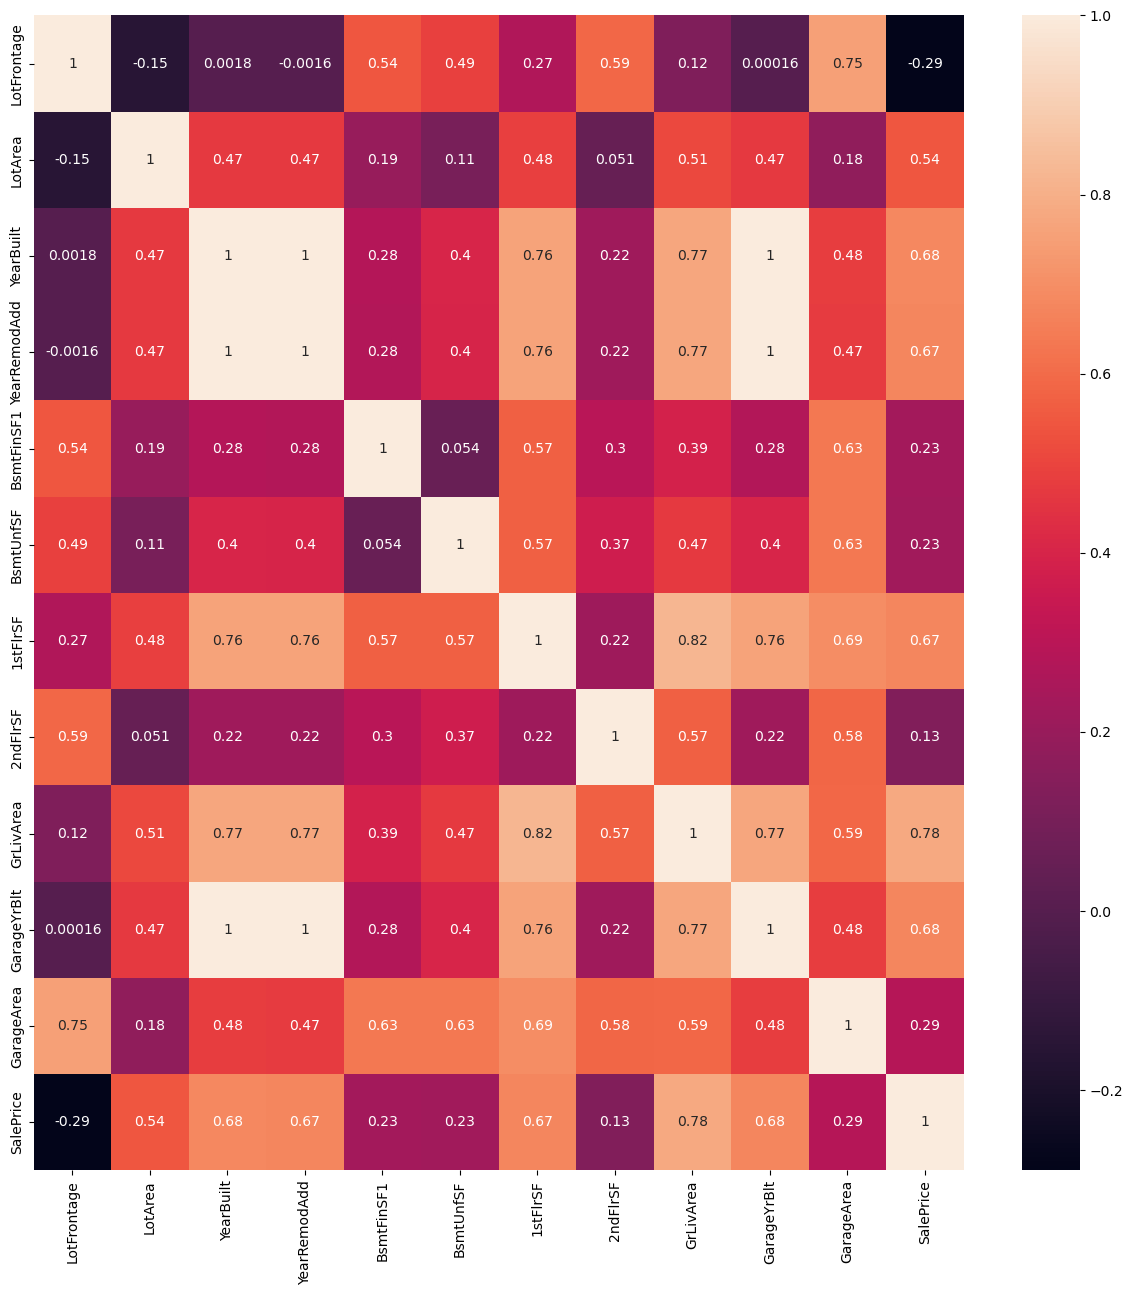

In [185]:
# Checking Correlation After removing correlated parameters
correlation = df_numeric.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)

### Insights:
Now there is not much multi collinearity between the features.  
We can go ahead with model building

### Splitting into X and y

In [186]:
df_final = pd.concat([df_numeric, df_categorical], axis=1)
X = pd.concat([df_numeric, df_categorical], axis=1)
y = X[['SalePrice']]
X = X.drop(['SalePrice'], axis=1)
X.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtUnfSF  \
0         65.0   8450.0     2003.0        2003.0       706.0      150.0   
1         80.0   9600.0     1976.0        1976.0       978.0      284.0   
2         68.0  11250.0     2001.0        2002.0       486.0      434.0   
3         60.0   9550.0     1915.0        1970.0       216.0      540.0   
4         84.0  14260.0     2000.0        2000.0       655.0      490.0   

   1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  MSSubClass_30  \
0     856.0     854.0     1710.0       2003.0       548.0              0   
1    1262.0       0.0     1262.0       1976.0       460.0              0   
2     920.0     866.0     1786.0       2001.0       608.0              0   
3     961.0     756.0     1717.0       1998.0       642.0              0   
4    1145.0    1053.0     2198.0       2000.0       836.0              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0              0              0               0   
4              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  OverallQual_2  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
0              0              0              0              0              1   
1              0              0              0              1              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              0   

   OverallQual_8  OverallQual_9  OverallQual_10  OverallCond_2  OverallCond_3  \
0              0              0               0              0              0   
1              0              0               0              0              0   
2              0              0               0              0              0   
3              0              0               0              0              0   
4              1              0               0              0              0   

   OverallCond_4  OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  \
0              0              1              0              0              0   
1              0              0              0              0              1   
2              0              1              0              0              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   OverallCond_9  BsmtFullBath_1  BsmtFullBath_2  BsmtFullBath_3  \
0              0               1               0               0   
1              0               0               0               0   
2              0               1               0               0 

In [187]:
y.head()

SalePrice
0   208500.0
1   181500.0
2   223500.0
3   140000.0
4   250000.0

### Pair - plot

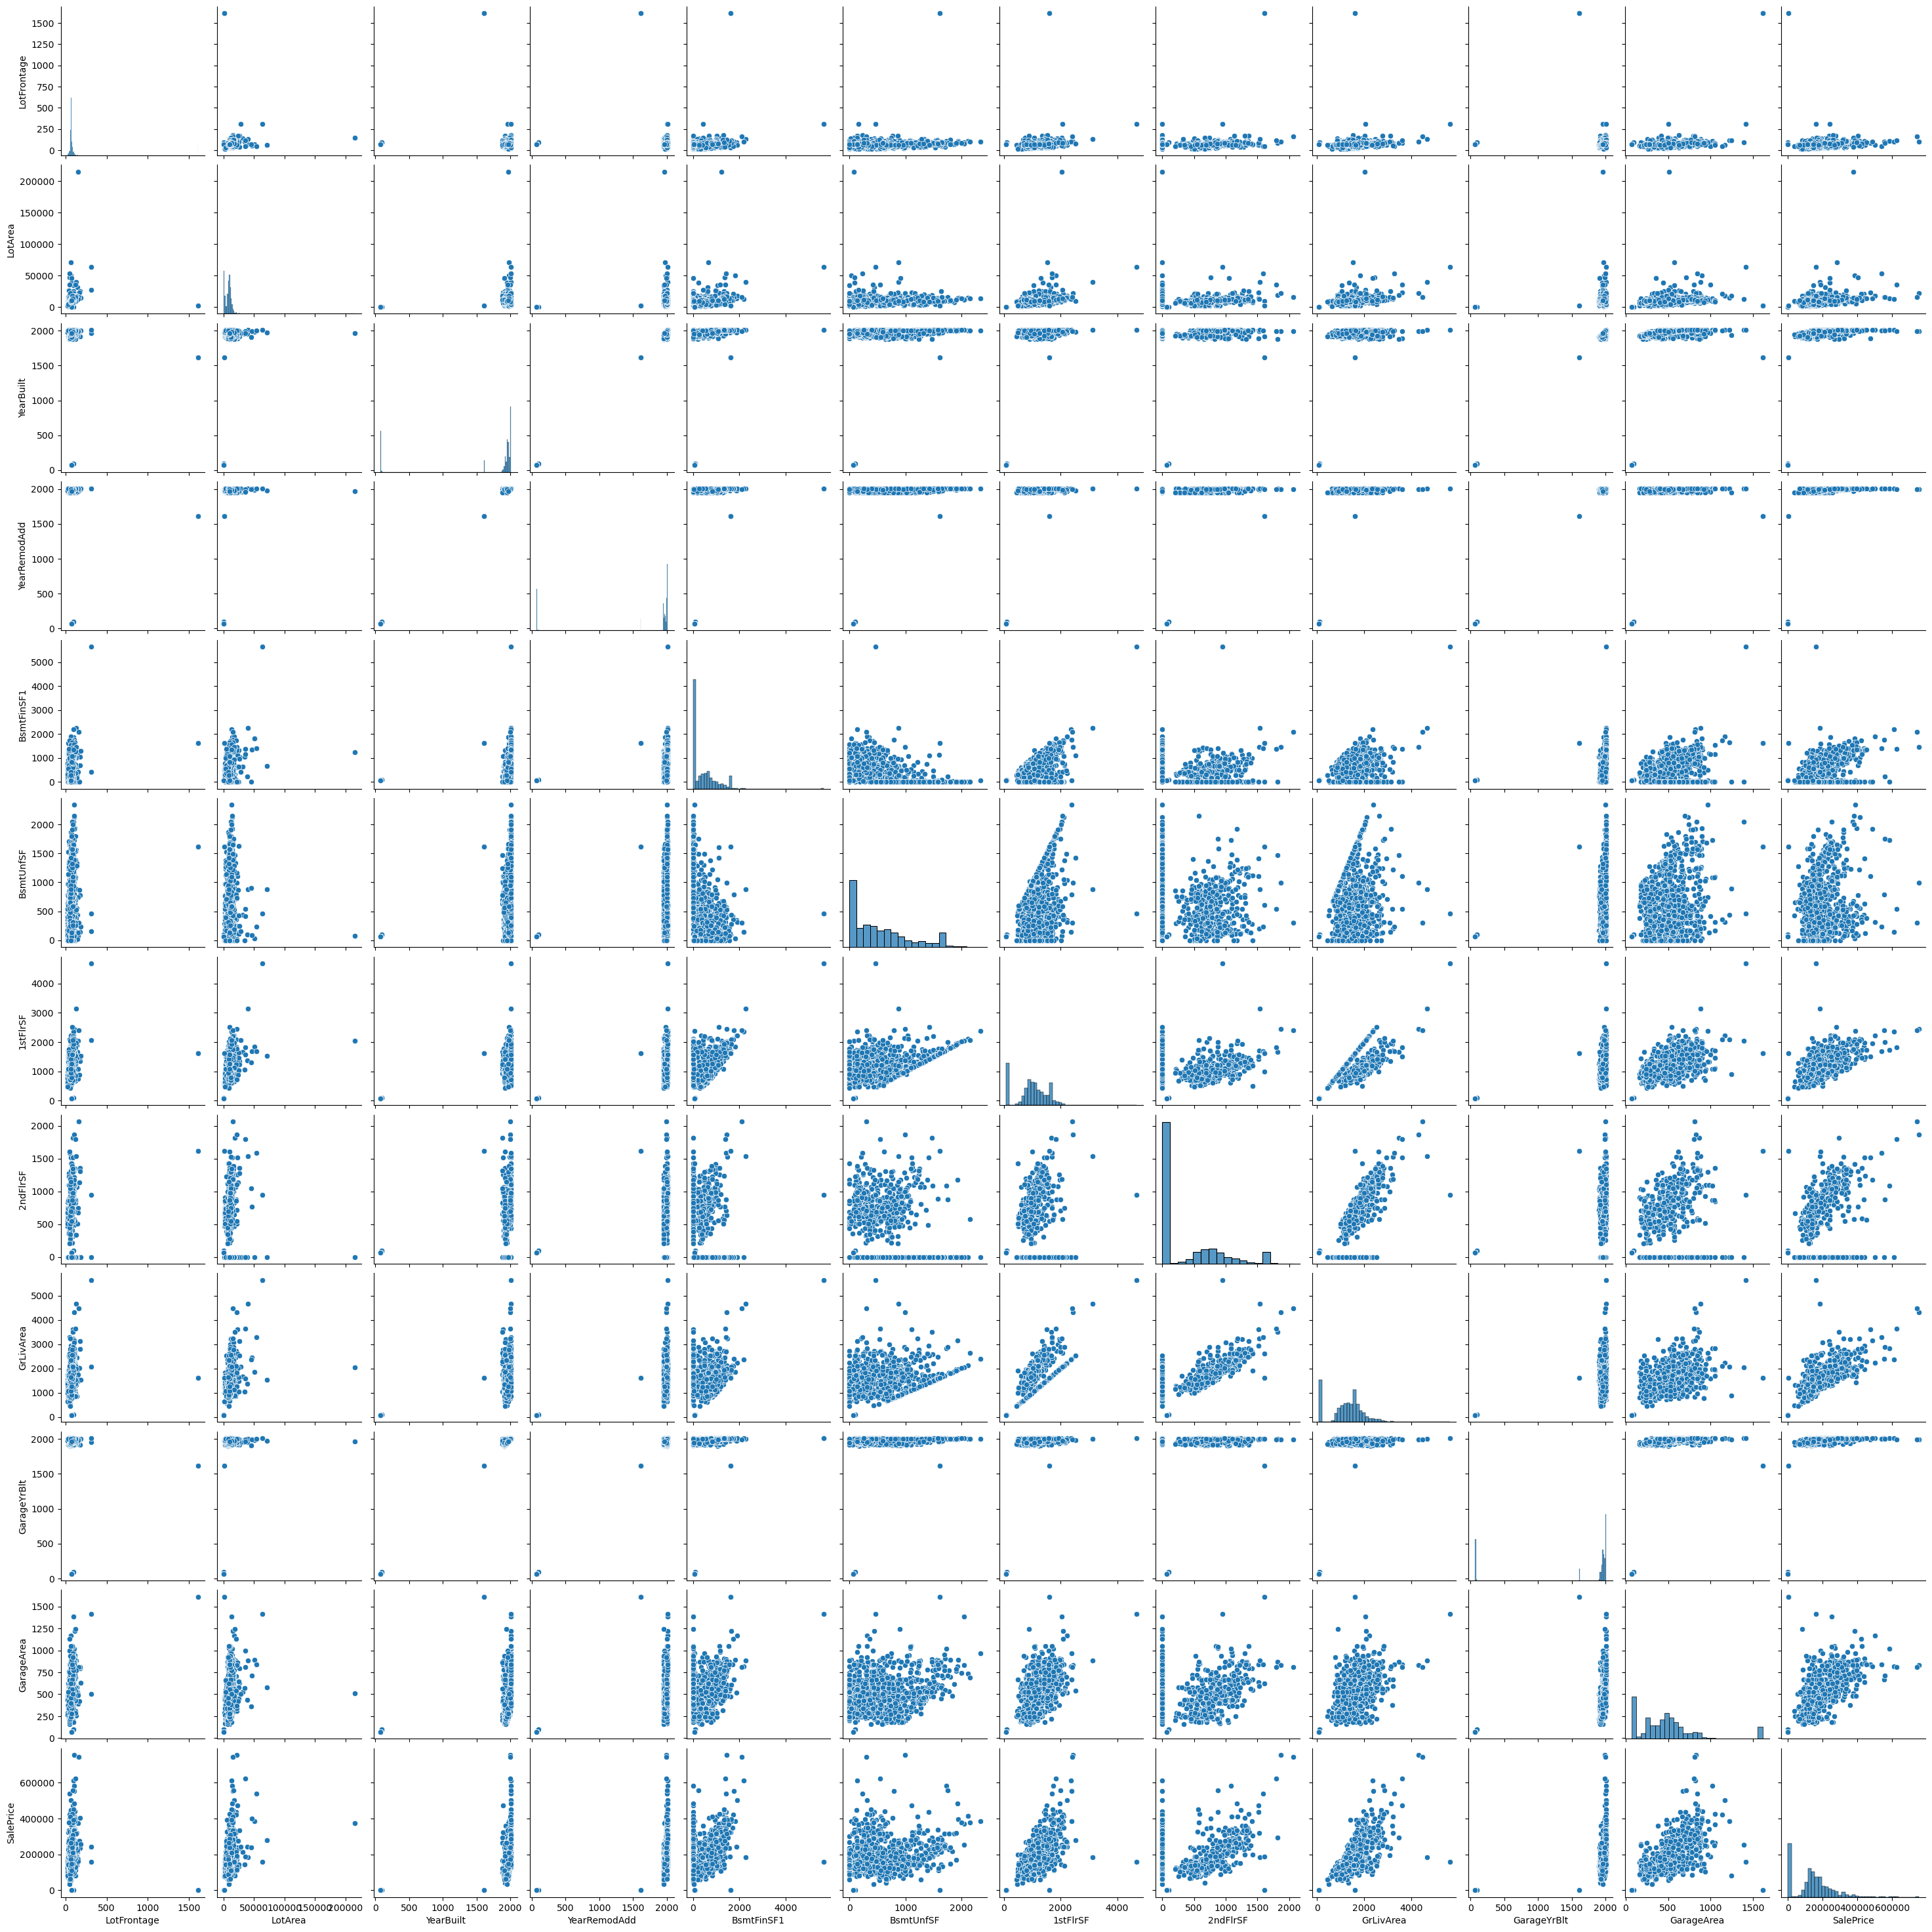

In [188]:
df_pair = df_numeric

sns.pairplot(df_pair)
plt.show()

### Train test Split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1021, 291) (438, 291) (1021, 1) (438, 1)


### Scaling Train and test dataset

In [190]:
numeric_col = df_numeric.columns
categorical_col = df_categorical.columns
numeric_col

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [191]:
scaling_numeric_col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea']

scaler = MinMaxScaler()
X_train[scaling_numeric_col] = scaler.fit_transform(X_train[scaling_numeric_col])
X_test[scaling_numeric_col] = scaler.transform(X_test[scaling_numeric_col])


In [192]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


### Building RFE Model

In [193]:
# Recursive Feature Elemination
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=60)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 59),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('1stFlrSF', False, 61),
 ('2ndFlrSF', False, 37),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageArea', True, 1),
 ('MSSubClass_30', False, 136),
 ('MSSubClass_40', False, 72),
 ('MSSubClass_45', False, 157),
 ('MSSubClass_50', False, 85),
 ('MSSubClass_60', False, 47),
 ('MSSubClass_70', False, 204),
 ('MSSubClass_75', False, 12),
 ('MSSubClass_80', False, 185),
 ('MSSubClass_85', False, 208),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 112),
 ('MSSubClass_160', False, 184),
 ('MSSubClass_180', False, 132),
 ('MSSubClass_190', False, 5),
 ('OverallQual_2', True, 1),
 ('OverallQual_3', True, 1),
 ('OverallQual_4', True, 1),
 ('OverallQual_5', True, 1),
 ('OverallQual_6', True, 1),
 ('OverallQual_7', True, 1),
 ('OverallQual_8', True, 1),
 ('OverallQual_9', True, 1),
 ('OverallQual_10', True, 1),
 ('Overal

In [194]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

lr = LinearRegression()
lr.fit(X_train_rfe, y_train)

y_train_pred = lr.predict(X_train_rfe)

X_test_rfe = X_test[col]
y_test_pred = lr.predict(X_test_rfe)

print(r2_score(y_test, y_test_pred))

print(r2_score(y_train, y_train_pred))
print(lr.coef_)

print(lr.intercept_)

0.8963605982878438
0.9451046255558935
[[-0.43769016  0.22726632  1.19519015  0.36533424  0.06936095  0.55093944
  -1.18335259  0.13780447  0.00398321 -0.03979377 -0.0263623  -0.04031995
  -0.04127781 -0.03844676 -0.02146774  0.01308093  0.08538574  0.13292126
  -0.01821688 -0.02413118 -0.00321172  0.00576535  0.00809151  0.01885517
   0.0278734   0.00869396  0.01542494  0.03309004 -0.01769441 -0.01539563
   0.00866714  0.00516768 -0.00882979 -0.03180148  0.01856896  0.01542494
  -0.65055826  0.00398321  1.05855767  1.13886367  1.06751947  1.05131849
   1.06807404  1.03403911  1.11442832  0.01940216 -0.00459737  0.01940216
  -0.00459737 -0.02371961 -0.04274074 -0.02109287 -0.02914511 -0.02896062
  -0.03007168 -0.04555387 -0.02537711 -0.02093668  0.01915118  0.01915118]]
[-1.01633282]


In [195]:
# Calculating R2 score, RSS, and RMSE
lr_metric = []

# R2 score 
r2_train_lr = r2_score(y_true=y_train, y_pred=y_train_pred)
print("R2 score of train data= ", r2_train_lr)
lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_true=y_test, y_pred=y_test_pred)
print("R2 score of test data = ", r2_test_lr)
lr_metric.append(r2_test_lr)

# RSS
rss_train_lr = np.sum(np.square(y_train - y_train_pred))
print("RSS of train data=", rss_train_lr)
lr_metric.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_test_pred))
print("RSS of test data =", rss_test_lr)
lr_metric.append(rss_test_lr)

# MSE 
mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("MSE of train data=", mse_train_lr)
lr_metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("MSE of test data =", mse_test_lr)
lr_metric.append(mse_test_lr)

R2 score of train data=  0.9451046255558935
R2 score of test data =  0.8963605982878438
RSS of train data= 1.0878685636196637
RSS of test data = 0.9678874658780436
MSE of train data= 0.0010654932062876235
MSE of test data = 0.0022097887348813783


### Ridge Regression

In [196]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train_rfe, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [197]:
print(model_cv.best_params_)

{'alpha': 0.05}


In [198]:
alpha = 0.05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
print(ridge.intercept_)
print(ridge.coef_)

[-0.66258862]
[[-0.3970239   0.19778422  0.43395352  0.30762785  0.05526153  0.51241788
  -0.4034596   0.12293394  0.00729917 -0.05164828 -0.03370967 -0.04611102
  -0.04311988 -0.03793651 -0.01768138  0.02211282  0.10073766  0.12656567
  -0.01202445 -0.02313365 -0.00370761  0.00764915  0.00868248  0.01754891
   0.02334123  0.00085335  0.01384238  0.03126088 -0.01875069 -0.01251019
   0.00933024  0.00252769 -0.00586513 -0.03839833 -0.02010811  0.01384238
  -0.55690282  0.00729917  0.67943658  0.72340149  0.65671817  0.63776284
   0.68426499  0.64908776  0.74367758  0.01407886 -0.01138382  0.01407886
  -0.01138382 -0.0192094  -0.02975501 -0.01250656 -0.0179686  -0.01394423
  -0.01869604 -0.03616665 -0.00954152 -0.00977019  0.01837398  0.01837398]]


In [199]:
# Calculating R2 score, RSS, and RMSE
y_train_pred_ridge = ridge.predict(X_train_rfe)
y_test_pred_ridge = ridge.predict(X_test_rfe)

ridge_metric = []

# R2 score 
r2_train_ridge = r2_score(y_true=y_train, y_pred=y_train_pred_ridge)
print("R2 score of train data= ", r2_train_ridge)
ridge_metric.append(r2_train_ridge)

r2_test_ridge = r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
print("R2 score of test data = ", r2_test_ridge)
ridge_metric.append(r2_test_ridge)

# RSS
rss_train_ridge = np.sum(np.square(y_train - y_train_pred_ridge))
print("RSS of train data=", rss_train_ridge)
ridge_metric.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test - y_test_pred_ridge))
print("RSS of test data =", rss_test_ridge)
ridge_metric.append(rss_test_ridge)

# MSE 
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
print("MSE of train data=", mse_train_ridge)
ridge_metric.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
print("MSE of test data =", mse_test_ridge)
ridge_metric.append(mse_test_ridge)

R2 score of train data=  0.9384484130279492
R2 score of test data =  0.9018275348000159
RSS of train data= 1.2197755673562838
RSS of test data = 0.9168317936195478
MSE of train data= 0.0011946871374694259
MSE of test data = 0.0020932232731039903


### Lasso Regression

In [200]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
print(model_cv.best_params_)


{'alpha': 0.0001}


In [202]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(lasso.intercept_)
print(lasso.coef_)

[-0.10225449]
[-3.31281561e-01  9.42861323e-02  6.41351550e-02  1.65620591e-01
  1.81022912e-02  4.63445719e-01  0.00000000e+00  1.15830729e-01
  4.68505840e-05 -0.00000000e+00 -1.11895840e-03 -1.49421332e-02
 -7.44738663e-03 -0.00000000e+00  2.40494413e-02  7.09729058e-02
  1.57682228e-01  1.45399203e-01 -0.00000000e+00 -2.78523203e-02
 -1.06872283e-02  6.29830195e-04  0.00000000e+00  5.28958544e-03
  8.57070688e-03 -4.21646224e-03  0.00000000e+00  3.44235748e-02
 -4.47663320e-03  0.00000000e+00  0.00000000e+00 -4.57497526e-04
 -0.00000000e+00 -3.87663478e-02 -6.40027575e-02  0.00000000e+00
 -3.65518503e-01  7.45292258e-03  4.97884254e-02  3.08014729e-02
  0.00000000e+00  0.00000000e+00  4.21629682e-02  3.63135336e-04
  1.36749125e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.21445780e-02 -0.00000000e+00
  0.00000000e+00  2.29997765e-03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.19211285e-02  3.26077970e-02  9.41101312e-19]


In [203]:
# Calculating R2 score, RSS, and RMSE
y_train_pred_lasso = lasso.predict(X_train_rfe)
y_test_pred_lasso = lasso.predict(X_test_rfe)

lasso_metric = []

# R2 score 
r2_train_lasso = r2_score(y_true=y_train, y_pred=y_train_pred_lasso)
print("R2 score of train data= ", r2_train_lasso)
lasso_metric.append(r2_train_lasso)

r2_test_lasso = r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
print("R2 score of test data = ", r2_test_lasso)
lasso_metric.append(r2_test_lasso)

# RSS
rss_train_lasso = np.sum(np.square(y_train - y_train_pred_lasso))
print("RSS of train data=", rss_train_lasso)
lasso_metric.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test - y_test_pred_lasso))
print("RSS of test data =", rss_test_lasso)
lasso_metric.append(rss_test_lasso)

# MSE 
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
print("MSE of train data=", mse_train_lasso)
lasso_metric.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
print("MSE of test data =", mse_test_lasso)
lasso_metric.append(mse_test_lasso)

R2 score of train data=  0.9047649486277424
R2 score of test data =  0.902354686432383
RSS of train data= 38004.95405627631
RSS of test data = 7555.192847373667
MSE of train data= 0.001848467220875057
MSE of test data = 0.002081983399855642


In [204]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': lr_metric
        }

lr_metrics1 = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metrics1, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.945105          0.938448          0.904765
1   R2 Score (Test)           0.896361          0.901828          0.902355
2       RSS (Train)           1.087869          1.219776      38004.954056
3        RSS (Test)           0.967887          0.916832       7555.192847
4       MSE (Train)           0.001065          0.001195          0.001848
5        MSE (Test)           0.002210          0.002093          0.002082

### Coefficients after regression

In [205]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['RFE_Linear'] = lr.coef_.reshape(60, 1)
betas['Ridge'] = ridge.coef_.reshape(60,1)
betas['Lasso'] = lasso.coef_.reshape(60,1)

pd.set_option('display.max_rows', None)
print(betas)

print(lr.intercept_, ridge.intercept_, lasso.intercept_)

                       RFE_Linear     Ridge         Lasso
LotFrontage             -0.437690 -0.397024 -3.312816e-01
LotArea                  0.227266  0.197784  9.428613e-02
YearBuilt                1.195190  0.433954  6.413516e-02
BsmtFinSF1               0.365334  0.307628  1.656206e-01
BsmtUnfSF                0.069361  0.055262  1.810229e-02
GrLivArea                0.550939  0.512418  4.634457e-01
GarageYrBlt             -1.183353 -0.403460  0.000000e+00
GarageArea               0.137804  0.122934  1.158307e-01
MSSubClass_90            0.003983  0.007299  4.685058e-05
OverallQual_2           -0.039794 -0.051648 -0.000000e+00
OverallQual_3           -0.026362 -0.033710 -1.118958e-03
OverallQual_4           -0.040320 -0.046111 -1.494213e-02
OverallQual_5           -0.041278 -0.043120 -7.447387e-03
OverallQual_6           -0.038447 -0.037937 -0.000000e+00
OverallQual_7           -0.021468 -0.017681  2.404944e-02
OverallQual_8            0.013081  0.022113  7.097291e-02
OverallQual_9 

## Residual Analysis on Train Data

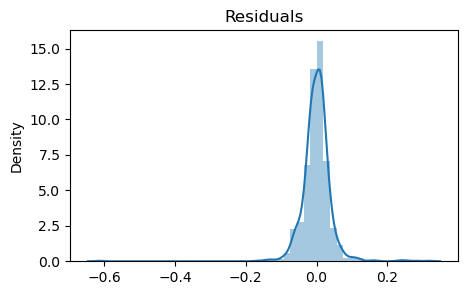

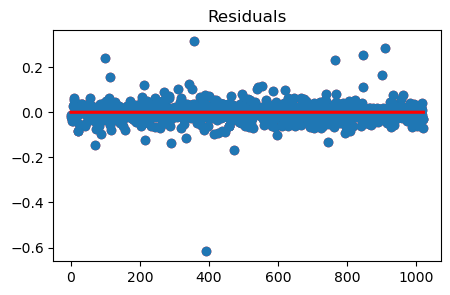

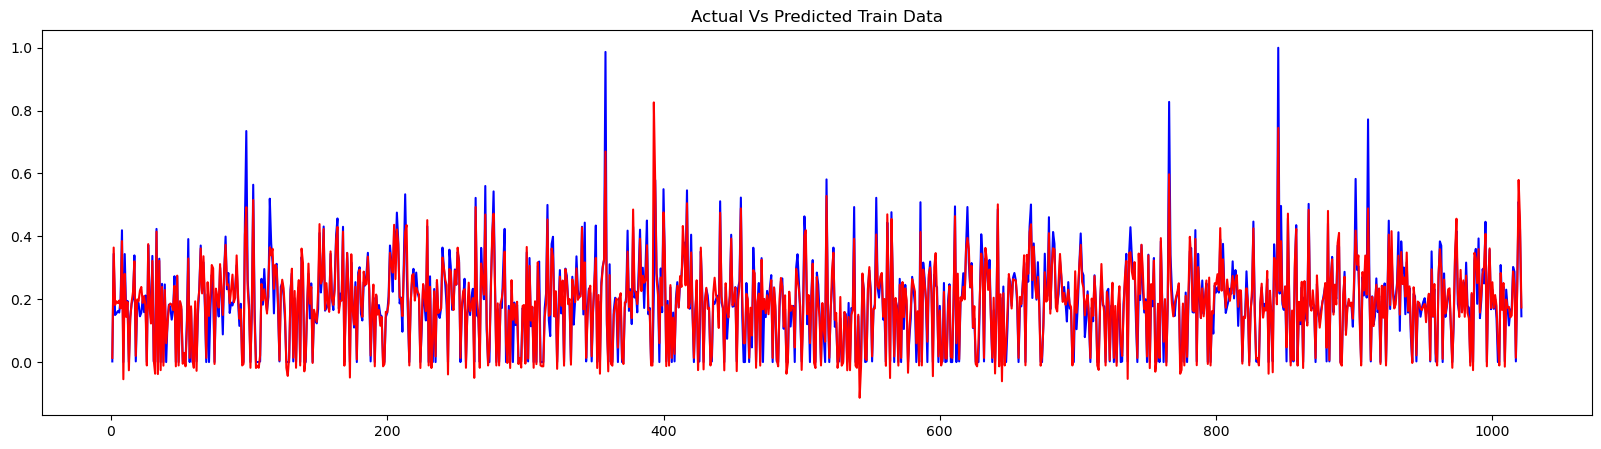

In [206]:
# For Lasso Regression

y_train_pred_lasso = y_train_pred_lasso.reshape(-1, 1)
res_train = y_train - y_train_pred_lasso

plt.figure(figsize=(5,3))
sns.distplot(res_train)
plt.title('Residuals')
plt.show()

x = np.arange(1, 1022)
plt.figure(figsize=(5,3))
sns.regplot(x=x, y=res_train, color='r', ci=None)
plt.scatter(x=x, y=res_train)
plt.title('Residuals')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(x, y_train, color='b')
plt.plot(x, y_train_pred_lasso, color='r')
plt.title('Actual Vs Predicted Train Data')
plt.show()

### Residual Analysis on Test Data

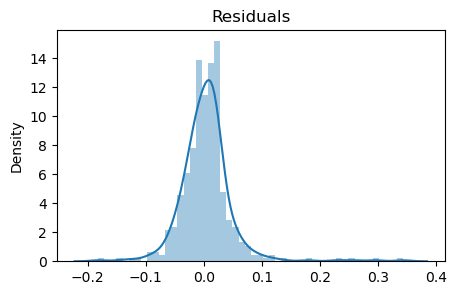

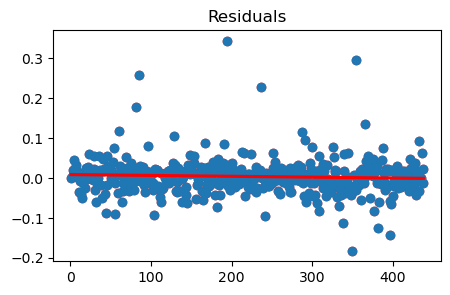

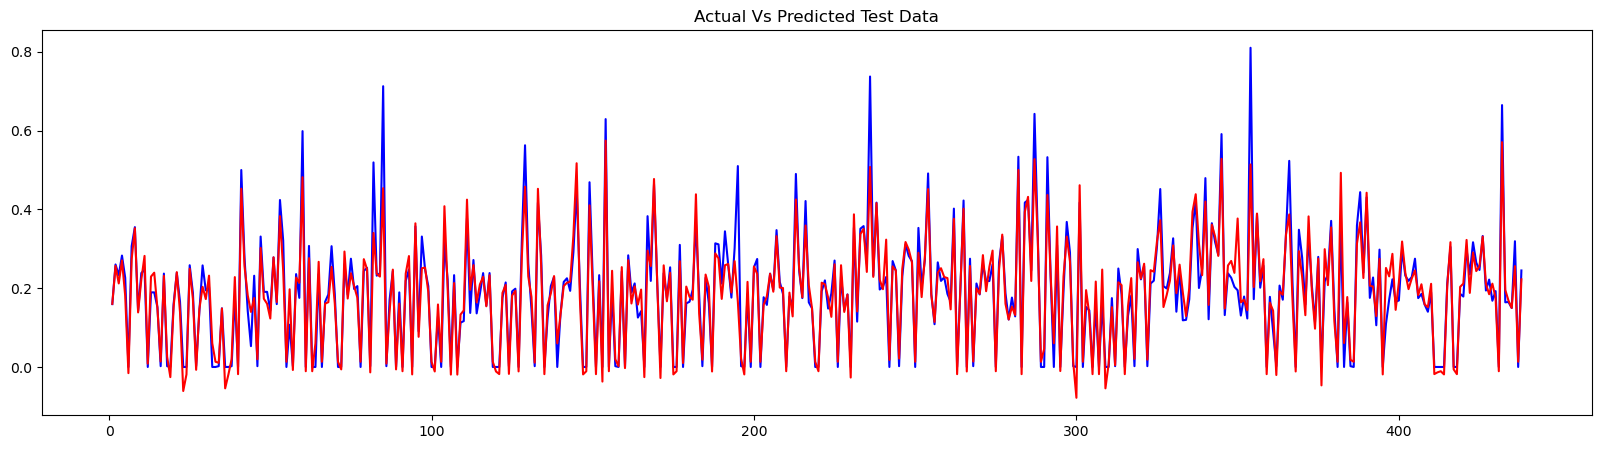

In [207]:
# For Lasso Regression

y_test_pred_lasso = y_test_pred_lasso.reshape(-1, 1)
res_test = y_test - y_test_pred_lasso

plt.figure(figsize=(5,3))
plt.title('Residuals')
sns.distplot(res_test)
plt.show()

x = np.arange(1, 439)
plt.figure(figsize=(5,3))
sns.regplot(x=x, y=res_test, color='r', ci=None)
plt.scatter(x=x, y=res_test)
plt.title('Residuals')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(x, y_test, color='b')
plt.plot(x, y_test_pred_lasso, color='r')
plt.title('Actual Vs Predicted Test Data')
plt.show()

# Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?   


### Ridge Regression Alpha = 0.05 * 2 = 0.1 

In [208]:
alpha = 0.05 * 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
print(ridge.intercept_)
print(ridge.coef_)

[-0.48815205]
[[-0.37945188  0.18245297  0.27792935  0.27129165  0.04670797  0.49312526
  -0.23791609  0.1208963   0.00815491 -0.05578878 -0.03682151 -0.0484156
  -0.04406753 -0.03805894 -0.01634652  0.02574637  0.10757466  0.12338044
  -0.01001758 -0.02340562 -0.00405647  0.00788056  0.00876166  0.01684912
   0.02196957 -0.00077867  0.0124424   0.02941352 -0.01925991 -0.01015361
   0.00891772  0.00107202 -0.00464443 -0.0419087  -0.03770179  0.0124424
  -0.50050339  0.00815491  0.49919036  0.52549868  0.46404172  0.44362348
   0.50152735  0.46580253  0.56719153  0.01180779 -0.01262946  0.01180779
  -0.01262946 -0.01720259 -0.02599359 -0.00896817 -0.01568516 -0.0091195
  -0.01515674 -0.03328205 -0.00476468 -0.00656296  0.0177873   0.0177873 ]]


### Lasso Regression Alpha = 0.0001 * 2 = 0.0002

In [209]:
alpha = 0.0001 * 2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(lasso.intercept_)
print(lasso.coef_)

[-0.06020125]
[-0.30755925  0.02887588  0.07734467  0.12116802  0.00203919  0.4519205
  0.          0.11198351  0.         -0.         -0.         -0.01649383
 -0.00848622 -0.          0.02422415  0.07333213  0.16098783  0.13904453
 -0.         -0.02133217 -0.00737093  0.00191413 -0.          0.00402556
  0.00591017 -0.          0.          0.03145756 -0.00373462  0.
  0.         -0.00196502  0.         -0.04420009 -0.04160697  0.
 -0.21930055  0.          0.01066314  0.          0.          0.
  0.         -0.          0.08856134  0.         -0.          0.
 -0.          0.         -0.01046306 -0.          0.          0.00103654
 -0.         -0.          0.          0.01297648  0.03198951  0.        ]


In [210]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = ridge.coef_.reshape(60,1)
betas['Lasso'] = lasso.coef_.reshape(60,1)

pd.set_option('display.max_rows', None)
print(betas)

print(ridge.intercept_, lasso.intercept_)

                          Ridge     Lasso
LotFrontage           -0.379452 -0.307559
LotArea                0.182453  0.028876
YearBuilt              0.277929  0.077345
BsmtFinSF1             0.271292  0.121168
BsmtUnfSF              0.046708  0.002039
GrLivArea              0.493125  0.451921
GarageYrBlt           -0.237916  0.000000
GarageArea             0.120896  0.111984
MSSubClass_90          0.008155  0.000000
OverallQual_2         -0.055789 -0.000000
OverallQual_3         -0.036822 -0.000000
OverallQual_4         -0.048416 -0.016494
OverallQual_5         -0.044068 -0.008486
OverallQual_6         -0.038059 -0.000000
OverallQual_7         -0.016347  0.024224
OverallQual_8          0.025746  0.073332
OverallQual_9          0.107575  0.160988
OverallQual_10         0.123380  0.139045
OverallCond_2         -0.010018 -0.000000
OverallCond_3         -0.023406 -0.021332
OverallCond_4         -0.004056 -0.007371
OverallCond_5          0.007881  0.001914
OverallCond_6          0.008762 -0

# Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [211]:
# Originaly alpha = 0.0001 for Lasso Regression

alpha = 0.0001
lasso = Lasso(alpha=alpha) 
lasso.fit(X_train_rfe, y_train)

feature = X_train_rfe.columns
lasso_coefficients = lasso.coef_

lasso_metric = pd.DataFrame({'Feature' : feature, 'lasso_coefficients' : lasso_coefficients})
lasso_metric_sorted = lasso_metric.sort_values(by='lasso_coefficients', ascending=False)
print(lasso_metric_sorted)


                  Feature  lasso_coefficients
5               GrLivArea        4.634457e-01
3              BsmtFinSF1        1.656206e-01
16          OverallQual_9        1.576822e-01
17         OverallQual_10        1.453992e-01
44       RoofMatl_WdShngl        1.367491e-01
7              GarageArea        1.158307e-01
1                 LotArea        9.428613e-02
15          OverallQual_8        7.097291e-02
2               YearBuilt        6.413516e-02
38       RoofMatl_CompShg        4.978843e-02
42       RoofMatl_Tar&Grv        4.216297e-02
27         KitchenAbvGr_1        3.442357e-02
58           SaleType_New        3.260780e-02
39       RoofMatl_Membran        3.080147e-02
14          OverallQual_7        2.404944e-02
4               BsmtUnfSF        1.810229e-02
57          GarageCond_TA        1.192113e-02
24          OverallCond_8        8.570707e-03
37        BldgType_Duplex        7.452923e-03
23          OverallCond_7        5.289585e-03
53          GarageQual_TA        2

In [212]:
top_5_features = ['GrLivArea', 'BsmtFinSF1', 'OverallQual_9', 'Condition2_PosN', 'LotFrontage']

# Dropping these 5 features
X_train_rfe_after_top5drop = X_train_rfe.drop(top_5_features, axis=1)

alpha = 0.0001
lasso = Lasso(alpha=alpha) 
lasso.fit(X_train_rfe_after_top5drop, y_train)

feature = X_train_rfe_after_top5drop.columns
lasso_coefficients = lasso.coef_

lasso_metric = pd.DataFrame({'Feature' : feature, 'lasso_coefficients' : lasso_coefficients})
lasso_metric_sorted = lasso_metric.sort_values(by='lasso_coefficients', ascending=False)
print(lasso_metric_sorted)

                  Feature  lasso_coefficients
0                 LotArea            0.348603
1               YearBuilt            0.245764
39       RoofMatl_WdShngl            0.117527
13         OverallQual_10            0.069072
53           SaleType_New            0.041709
28         TotRmsAbvGrd_9            0.027767
48          GarageQual_TA            0.018220
20          OverallCond_8            0.010171
52          GarageCond_TA            0.007609
37       RoofMatl_Tar&Grv            0.004719
33       RoofMatl_CompShg            0.004378
30        TotRmsAbvGrd_12            0.002163
17          OverallCond_5            0.001879
18          OverallCond_6            0.000021
38       RoofMatl_WdShake           -0.000000
31        TotRmsAbvGrd_14           -0.000000
34       RoofMatl_Membran            0.000000
35         RoofMatl_Metal            0.000000
36          RoofMatl_Roll            0.000000
49          GarageCond_Fa           -0.000000
51          GarageCond_Po         

In [213]:
new_top_5_features = ['LotArea', 'YearBuilt', 'OverallQual_3', 'OverallQual_4', 'OverallQual_2' ]